# Descripcion del problema


Informacion relevante:

   Los datos están relacionados con las campañas de marketing  de una institución bancaria portuguesa.
   Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto para el mismo cliente,
   con el fin de acceder a un credito bancario  y si esta o no interesado 
   
   Informacion sobre el conjunto de datos 
   
   El conjuto de datos original contiene 45.211 registros y 16 atributos + la clase obejetivo con dos categoria si o no 
  
    1) bank-full.csv con todos los ejemplos, ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).
    2) bank.csv con el 10% de los ejemplos (4521), seleccionados aleatoriamente de bank-full.csv.
    3) bank-additional-full.csv con todos los ejemplos, ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).
    4) bank-additional.csv con el 10% de los ejemplos (4521), seleccionados aleatoriamente de bank-full.csv.
    El conjunto de datos más pequeño se proporciona para probar algoritmos de aprendizaje automático más exigentes       computacionalmente (por ejemplo, SVM).

## Preparacion de datos
importamos todas las librerías necesarias para trabajar Aprendizaje Automático con Python y Sci-kit learn

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io
import requests
from sklearn.metrics import classification_report, confusion_matrix

##### 1) bank-full.csv contiene (4521) instancias y 17 atributos , ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).

In [10]:
ds_ = pd.read_csv('bank-full.csv', sep=';', na_values=" ?" )# se carga el cojunto de datos csv
ds = ds_.dropna() # se elimina las filas/columnas con valores null
ds = ds.rename(columns = {ds.columns.values[16]:'C'}) # renombramos la ultima columna por "C" de clase
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
ds = ds.apply(le.fit_transform) # Convertimos los valores de object a numericos
ds.head() # se verifica el resultado de cargue de los datos 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,C
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


## Dividir el conjunto de datos 
Dividir aleatoriamente el conjunto de datos cargado y normalizado en anterior paso en "ds"  70% para train y 30% para test,
adicionalmente se extraera 10% de los datos de train para crear el conjunto de validadcion 

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
x= ds.drop('C', axis = 1)
y= ds['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
test = pd.DataFrame(x_test) #Se crea data frame con los datos extraidos
test['C'] =y_test
x_strainval, x_stestval, y_strainval,y_stestval = train_test_split(x,y, test_size = 0.1, random_state=1)
print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))
print('Conteo de Clases conjunto train Validacion  {}'.format(Counter( y_strainval)))
print('Conteo de Clases conjunto test Validacion   {}'.format(Counter( y_stestval)))

Conteo de clases conjunto train Counter({0: 27909, 1: 3738})
Conteo de Clases conjunto test  Counter({0: 12013, 1: 1551})
Conteo de Clases conjunto train Validacion  Counter({0: 35939, 1: 4750})
Conteo de Clases conjunto test Validacion   Counter({0: 3983, 1: 539})


Se realiza un histograma para conocer la distribucion y proporcion de las clases

Clase 0: 39922
Clase 1: 5289
Proporcion: 7.55 : clase[0] / clase[1]


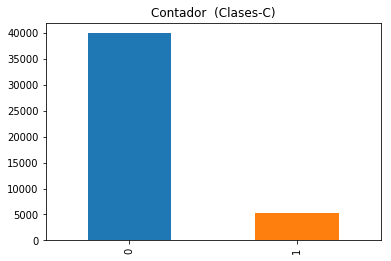

In [5]:
target_count = ds['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
target_count.plot(kind='bar', title='Contador  (Clases-C)');

Reducción de datos: dimensionalidad, numerosidad, datos.
compresión, para esto se realiza una matriz de correlacion. 

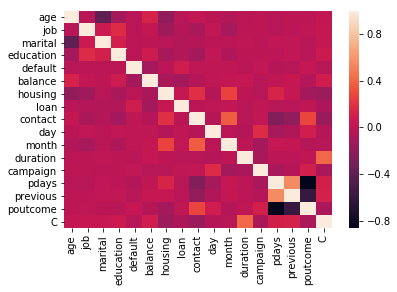

In [94]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

se puede observa que existe una alta  correlacion evidente entre los atributos "pdays, previous", aunque por ahora 
no se tomara deciciones al respecto hasta no realizar las primeros experimento  con los modelos.

# Tecnica de Clasificacion # 1 (SVM)

Se realizaran algunas pruebas para estimar cuales parametros permiten el mejor desempeño de la SVM, debido al alto costo 
computacional la evaluacion de dichos parametros se ralizara con conjunto de validacion .



### Estimacion del mejor C para la SVM.

In [43]:
########################################################################
#################### Linear SVM C=10.0 ##################################

SVM10 = svm.LinearSVC(dual=False, C=10.0)
SVM10.fit(x_strainval, y_strainval)

SVM10_predict = SVM10.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=10.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM10_predict))
print(metrics.confusion_matrix(y_stestval, SVM10_predict))

########################################################################
#################### Linear SVM C=50.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=50.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=50.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))

########################################################################
#################### Linear SVM C=500.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=500.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=500.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))


############## Accuracy Linear SVM C=10.0 ##################
0.8874391862007961
[[3912   71]
 [ 438  101]]

############## Accuracy Linear SVM C=50.0 ##################
0.8876603272888103
[[3917   66]
 [ 442   97]]

############## Accuracy Linear SVM C=500.0 ##################
0.888766032728881
[[3918   65]
 [ 438  101]]


### Evaluacion de mejor kernel (rbf, sigmoid)

Como se puede observar no es posible establecer un mejor C pues todos tiene comportamietos similares 

 

In [33]:
########################################################################
########################### RBF SVM ####################################

SVMrbf = svm.SVC(kernel='rbf')
SVMrbf.fit(x_strainval, y_strainval)

SVMrbf_predict = SVMrbf.predict(x_stestval)

print("\n############## Accuracy SVM RBF ##################")
print(metrics.accuracy_score(y_stestval, SVMrbf_predict))
print(metrics.confusion_matrix(y_stestval, SVMrbf_predict))

########################################################################
########################## Sigmoid SVM #################################

SVMsigmoid = svm.SVC(kernel='sigmoid')
SVMsigmoid.fit(x_strainval, y_strainval)

SVMsigmoid_predict = SVMsigmoid.predict(x_stestval)

print("\n############## Accuracy SVM Sigmoid ##################")
print(metrics.accuracy_score(y_stestval, SVMsigmoid_predict))
print(metrics.confusion_matrix(y_stestval, SVMsigmoid_predict))


C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



############## Accuracy SVM RBF ##################
0.8808049535603715
[[3983    0]
 [ 539    0]]


C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



############## Accuracy SVM Sigmoid ##################
0.8808049535603715
[[3983    0]
 [ 539    0]]


### ******Iteracion 1.1 SVM Lineal********
##### Se realiza la iteracion de SVM Lineal con los datos de train y test originales 45211 instacias 17atributos ,

Conjunto de Datos  

train = (31647 instacias y 17 atributos),
test  = (13.564 instancias y 16 atributos sin la Clase)

Dado que el mejor desempeño lo obtuvo el kernel Lineal en adelante se utilizara este.

In [20]:
########################################################################
#################### Linear SVM FINAL ##################################
x_train =ds.drop('C', axis = 1)
y_train = ds['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']
SVM = svm.LinearSVC(dual=False, C=1)
SVM.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))


############## Accuracy Linear SVM FINAL ##################
0.8904452963727514
[[11822   191]
 [ 1295   256]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.57      0.17      0.26      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



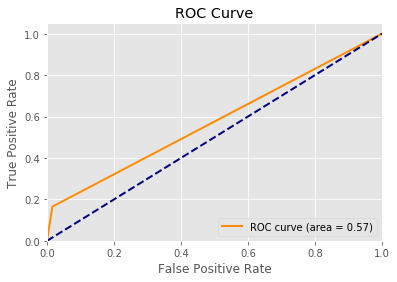

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, SVM_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Eliminacion de atributos con alta correlacion , dado aque en la matriz de correlacion graficada al inicio del experimento se evidencio una alta correlacion entre los atributos pdays , poutcome y previous se procede a eliminar los dos primero y dejar previous 


In [23]:
#%reset
del ds['pdays']
del ds['poutcome']
del test['pdays']
del test['poutcome']
ds.head()

KeyError: 'pdays'

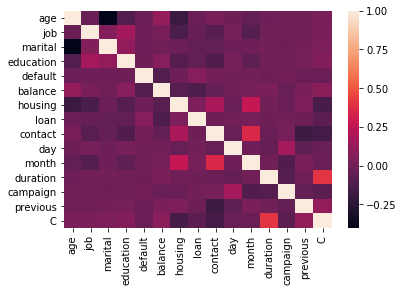

In [14]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

### ******Iteracion 1.2 SVM Lineal********

Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)



In [22]:
########################################################################
#################### Linear SVM FINAL ##################################
x_train =ds.drop('C', axis = 1)
y_train = ds['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']
SVM = svm.LinearSVC(dual=False, C=10.0)
SVM.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))


############## Accuracy Linear SVM FINAL ##################
0.8910350928929519
[[11822   191]
 [ 1287   264]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.58      0.17      0.26      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



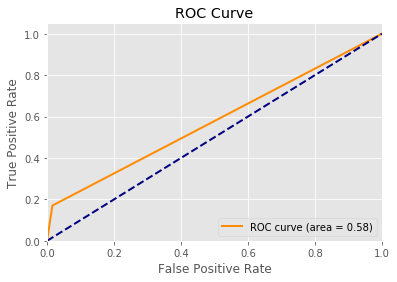

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, SVM_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### como se puede observar el accuracy y la precision mejor en comparacion a las anteriores realizadas por tal razon los siguientes experimentos se realizaran con el conjunto de datos modificado sin la dos columnas padys y poutcome

# Tecnica de Clasificacion # 2 (K-Vecinos mas cercanos)


### ******Iteracion 2 K-NN********

Dado que la eliminacion de los datos con alta correlacion mejoro la clasificacion en SVM en adelante,
se utilizara este mismo conjunto de datos. 


Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)

In [25]:
################################################################
##################  K-Vecinos más cercanos #####################
################################################################
x_train =ds.drop('C', axis = 1)
y_train = ds['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']
n_neighbors = 17
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)

print("\n############## Accuracy KNN ##################")
print(metrics.accuracy_score(y_test, KNN_predict))
print(metrics.confusion_matrix(y_test, KNN_predict))
print(classification_report(y_test,KNN_predict))


############## Accuracy KNN ##################
0.8930993807136538
[[11807   206]
 [ 1244   307]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.60      0.20      0.30      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



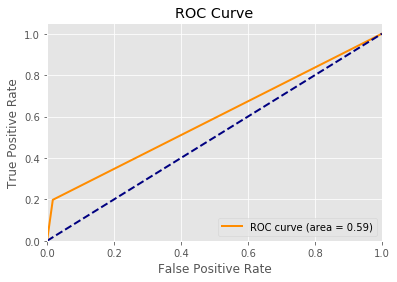

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, KNN_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tecnica de Clasificacion # 3 (Redes neuronales MLP)

##### Se probaran diferentes opciones de arquitectura el evaluar la mejor configuracion del MLP


############## Accuracy MLP ##################
0.8980539584254754
[[3859  124]
 [ 337  202]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3983
           1       0.62      0.37      0.47       539

   micro avg       0.90      0.90      0.90      4522
   macro avg       0.77      0.67      0.71      4522
weighted avg       0.88      0.90      0.89      4522



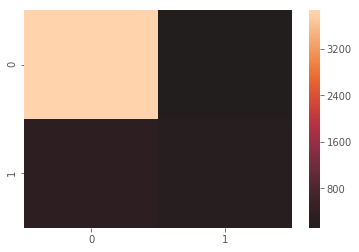


############## Accuracy MLP ##################
0.8865546218487395
[[3930   53]
 [ 460   79]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3983
           1       0.60      0.15      0.24       539

   micro avg       0.89      0.89      0.89      4522
   macro avg       0.75      0.57      0.59      4522
weighted avg       0.86      0.89      0.85      4522



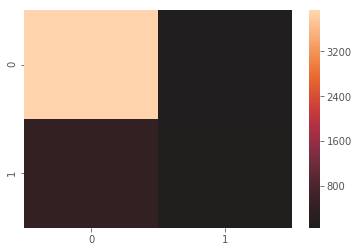

In [34]:
#### ensayar diferentes opciones de arquitectura y estimar la tasa de aprendizaje

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

clf = MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13), 
                    random_state=42, learning_rate_init=0.0016)
clf.fit(x_strainval, y_strainval)

clf_predict = clf.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf_predict))
print(metrics.confusion_matrix(y_stestval, clf_predict))
print(classification_report(y_stestval, clf_predict))
sns.heatmap(metrics.confusion_matrix(y_stestval, clf_predict), center=True)
plt.show()

##########################################################################

clf2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), 
                    random_state=42, learning_rate_init=0.001)
clf2.fit(x_strainval, y_strainval)

clf2_predict = clf2.predict(x_stestval)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_stestval, clf2_predict))
print(metrics.confusion_matrix(y_stestval, clf2_predict))
print(classification_report(y_stestval, clf2_predict))
sns.heatmap(metrics.confusion_matrix(y_stestval, clf2_predict), center=True)
plt.show()

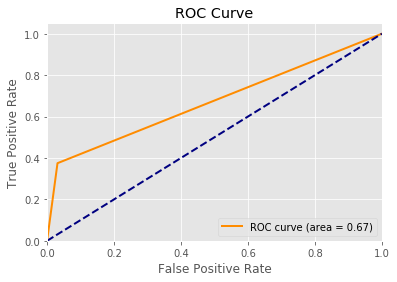

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_stestval, clf_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### ******Iteracion 3.1 Redes Neuronales MLP********


Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos),
test  = (13.564 instancias y 14 atributos sin la Clase)


############## Accuracy MLP ##################
0.8885284576820996
[[11657   356]
 [ 1156   395]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12013
           1       0.53      0.25      0.34      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.72      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564

Mean Absolute Error: 0.11147154231790032
Mean Squared Error: 0.11147154231790032
Root Mean Squared Error: 0.33387354240475586


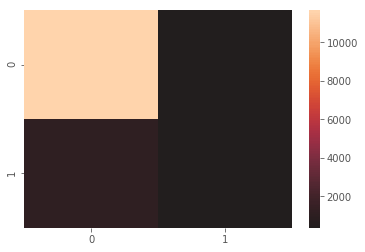

In [27]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), 
                    random_state=42, learning_rate_init=0.001)

clf.fit(x_train, y_train)

clf_predict2 = clf.predict(x_test)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(y_test, clf_predict2))
print(metrics.confusion_matrix(y_test, clf_predict2))
print(classification_report(y_test, clf_predict2))
sns.heatmap(metrics.confusion_matrix(y_test, clf_predict2), center=True)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,clf_predict2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,clf_predict2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,clf_predict2)))
plt.show()

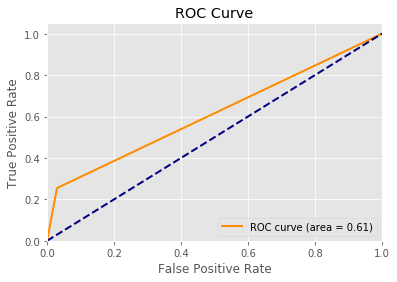

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, clf_predict2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tecnica de Clasificacion # 4 (Arboles de Decision)

Conjunto de Datos 45211 instacias 15 atributos

train = (31647 instacias y 15 atributos), test = (13.564 instancias y 14 atributos sin la Clase)

In [16]:
################################################################
#################### ÁRBOL DE DECISIÓN #########################
################################################################

DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(x_train, y_train)


DT_predict = DT_clf.predict(x_test)

print("\n############## Accuracy DT##################")
print(metrics.accuracy_score(y_test, DT_predict))
print("\n############## Matriz de Confusion DT ##################")
print(metrics.confusion_matrix(y_test, DT_predict))  
print("\n############## Metricas DT ##################")
print(metrics.classification_report(y_test, DT_predict)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, DT_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, DT_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, DT_predict)))


############## Accuracy DT##################
1.0

############## Matriz de Confusion DT ##################
[[12013     0]
 [    0  1551]]

############## Metricas DT ##################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12013
           1       1.00      1.00      1.00      1551

   micro avg       1.00      1.00      1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


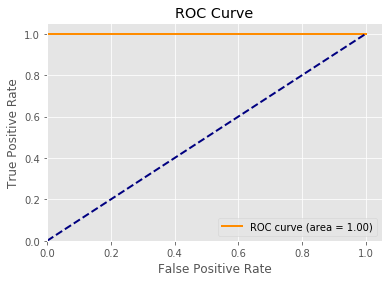

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, DT_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()